# Toy data
> Randomly-spaced points on a hyperbolic branch

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.toy_data import generate_points_on_branch


In [3]:
# Generate 2 sets of points, for classification:

root = np.array([1.0, 0.0, 0.0])

points1 = generate_points_on_branch(
    root=root,
    direction=np.array([0.0, 1.0, 1.0]),
    num_points=100,
    noise_std=0.05,
)

points2 = generate_points_on_branch(
    root=root,
    direction=np.array([0.0, -1.0, 1.0]),
    num_points=100,
    noise_std=0.1,
)

data = np.vstack([points1, points2])
labels = np.hstack([np.zeros(100), np.ones(100)])


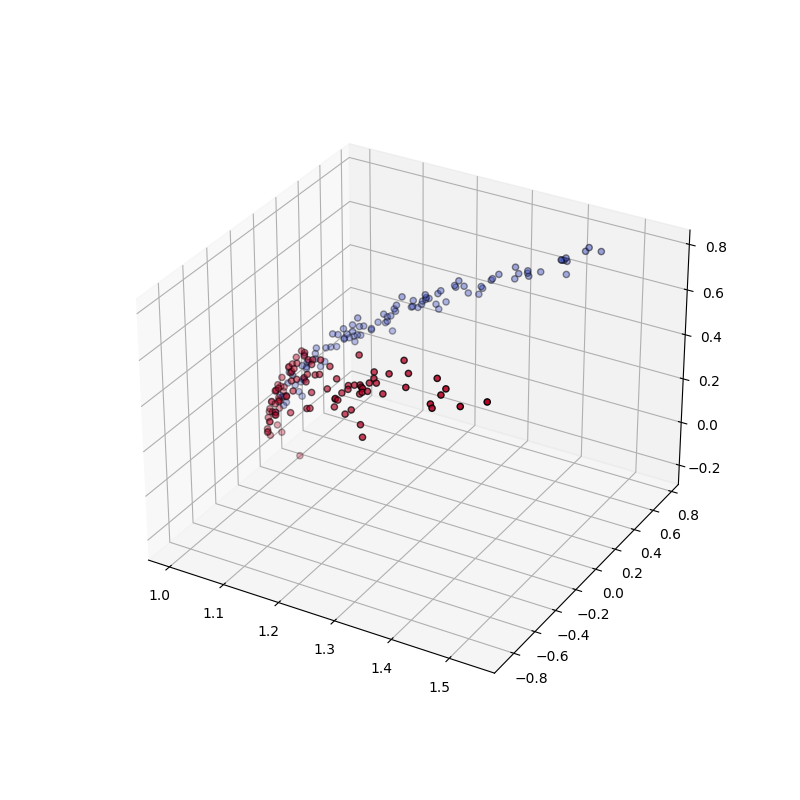

In [4]:
# Plot the points

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    data[:, 0], data[:, 1], data[:, 2], c=labels, cmap="coolwarm", edgecolor="k"
)
plt.show()


In [13]:
# Try to classify using hyperbolic and regular decision trees

from sklearn.tree import DecisionTreeClassifier
from src.tree import HyperbolicDecisionTreeClassifier  # , DecisionTree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Hyperparameters
MIN_SAMPLES = 2
MAX_DEPTH = 10
args = dict(min_samples=MIN_SAMPLES, max_depth=MAX_DEPTH)

# Fit a regular decision tree
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

# Fit a hyperbolic decision tree
hdt = HyperbolicDecisionTreeClassifier(**args)
hdt.fit(X_train, y_train)

# Control dt
hdt_control = HyperbolicDecisionTreeClassifier(hyperbolic=False, **args)
hdt_control.fit(X_train, y_train)

# Random forest
hrf = HyperbolicRandomForestClassifier(
    n_estimators=1000, hyperbolic=True, **args
)
hrf.fit(X_train, y_train)

hrf_control = HyperbolicRandomForestClassifier(
    n_estimators=1000, hyperbolic=False, **args
)
hrf_control.fit(X_train, y_train)

# Compare scores
print(
    f"Regular decision tree accuracy: {accuracy_score(y_test, dt.predict(X_test)):.3f}",
    f"Hyperbolic decision tree accuracy: {accuracy_score(y_test, hdt.predict(X_test)):.3f}",
    f"Hyperbolic decision tree accuracy (control): {accuracy_score(y_test, hdt_control.predict(X_test)):.3f}",
    f"Hyperbolic random forest accuracy: {accuracy_score(y_test, hrf.predict(X_test)):.3f}",
    f"Hyperbolic random forest accuracy (control): {accuracy_score(y_test, hrf_control.predict(X_test)):.3f}",
    sep="\n",
)


Regular decision tree accuracy: 0.925
Hyperbolic decision tree accuracy: 0.525
Hyperbolic decision tree accuracy (control): 0.950
Hyperbolic random forest accuracy: 0.525
Hyperbolic random forest accuracy (control): 0.950


In [6]:
# Traverse the tree:
def traverse(node):
    if node.leaf:
        return [node]
    else:
        return traverse(node.right) + traverse(node.left)


print(hdt.tree.id, hdt.tree.value, sep="\t")
for x in traverse(hdt.tree):
    print(x.id, x.value, sep="\t")


print()
print(hdt_control.tree.id, hdt_control.tree.value, sep="\t")
for x in traverse(hdt_control.tree):
    print(x.id, x.value, sep="\t")


AttributeError: 'HyperbolicDecisionNode' object has no attribute 'id'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(estimator=hdt)


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'estimator'

In [8]:
from src.forest import HyperbolicRandomForestClassifier

hrf = HyperbolicRandomForestClassifier()

hrf.fit(X_train, y_train)
